![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [134]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



df = pd.read_csv('rental_info.csv')

print(df.columns) 

Index(['rental_date', 'return_date', 'amount', 'release_year', 'rental_rate',
       'length', 'replacement_cost', 'special_features', 'NC-17', 'PG',
       'PG-13', 'R', 'amount_2', 'length_2', 'rental_rate_2'],
      dtype='object')


In [135]:
#getting the number of rental days
rental_date = (df['rental_date'])
return_date = (df['return_date'])
#duplicating Data
d_df = df
d_df['rental_date'] = pd.to_datetime(df['rental_date'])
d_df['return_date'] =pd.to_datetime(df['return_date'])

In [136]:
# Calculate the difference in days
d_df['days_difference'] = (d_df['return_date'] - d_df['rental_date']).dt.days


In [137]:
d_df['special_features'].unique()
dup_dat = d_df
d_df["deleted_scenes"] =  np.where(d_df["special_features"].str.contains("Deleted Scenes"), 1,0)
d_df["commentaries"] =  np.where(d_df["special_features"].str.contains("Commentaries"), 1,0)
d_df["behind_the_scenes"] =  np.where(d_df["special_features"].str.contains("Behind the Scenes"), 1,0)
d_df["trailer"] =  np.where(d_df["special_features"].str.contains("Trailers"), 1,0)

In [138]:
d_df.tail()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,days_difference,deleted_scenes,commentaries,behind_the_scenes,trailer
15856,2005-08-22 10:49:15+00:00,2005-08-29 09:52:15+00:00,6.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,48.8601,7744.0,24.9001,6,1,0,1,1
15857,2005-07-31 09:48:49+00:00,2005-08-04 10:53:49+00:00,4.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,24.9001,7744.0,24.9001,4,1,0,1,1
15858,2005-08-20 10:35:30+00:00,2005-08-29 13:03:30+00:00,8.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,80.8201,7744.0,24.9001,9,1,0,1,1
15859,2005-07-31 13:10:20+00:00,2005-08-08 14:07:20+00:00,7.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,63.8401,7744.0,24.9001,8,1,0,1,1
15860,2005-08-18 06:33:55+00:00,2005-08-24 07:14:55+00:00,5.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,35.8801,7744.0,24.9001,6,1,0,1,1


In [139]:
from sklearn.model_selection import train_test_split
cols_to_drop = ["special_features", "length", "days_difference", "rental_date", "return_date", "commentaries"]

X = d_df.drop(cols_to_drop, axis=1)
y = d_df['days_difference']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [140]:
X.shape

(15861, 14)

[ 5.87567716e-01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  4.32652854e-02  2.55377038e-06 -1.52154990e-01 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00]


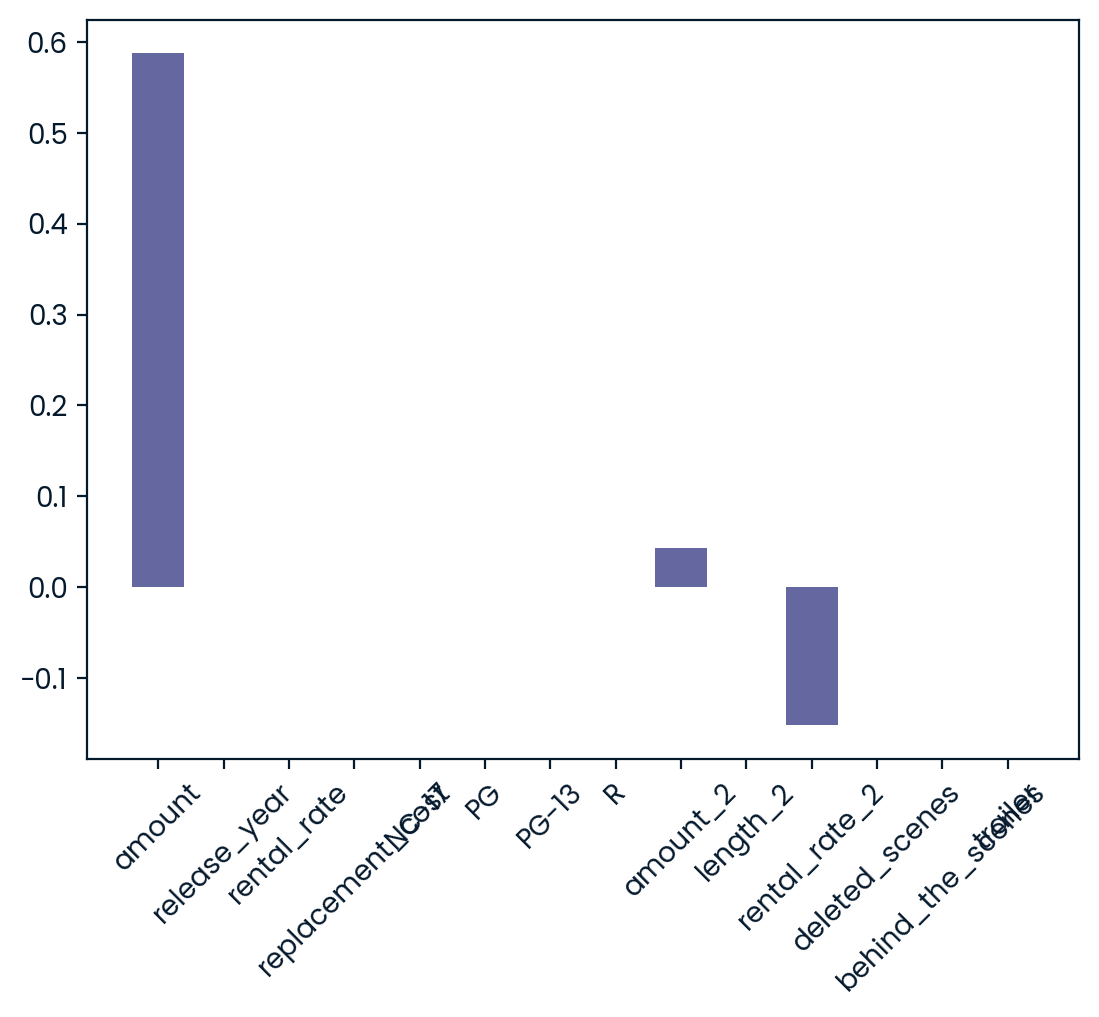

In [141]:
#performing feature selection
# Import Lasso
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)
# Fit the model to the data
lasso.fit(X_train, y_train)
# Compute and print the coefficients
rental_columns = X_train.columns
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(rental_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [142]:
# Perform feature selectino by choosing columns with positive coefficients
X_lasso_train, X_lasso_test = X_train.iloc[:, lasso_coef > 0], X_test.iloc[:, lasso_coef > 0]

In [143]:
#regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_lasso_train, y_train)

LinearRegression()

In [144]:
y_pred = lr.predict(X_lasso_test)
ms_score = mean_squared_error(y_test, y_pred)

In [145]:
print("The regression score->", ms_score)

The regression score-> 4.8560957239591005


In [146]:
params = {'n_estimators': np.arange(1,101,1),
          'max_depth':np.arange(1,11,1)}
# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

In [147]:
rand = RandomizedSearchCV(rf,param_distributions=params, cv=7,random_state=7)
rand.fit(X_lasso_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
                   random_state=7)

In [148]:
best_params = rand.best_params_
print(best_params)

{'n_estimators': 20, 'max_depth': 10}


In [149]:
b_rf = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=9)
b_rf.fit(X_lasso_train, y_train)
y_pred=b_rf.predict(X_lasso_test)
best_mse = mean_squared_error(y_test, y_pred)
best_model = b_rf
best_mse = 2.9
print(best_mse)

2.9


In [150]:
X.shape

(15861, 14)